In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re



sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
import MMDforGraphs as mg
importlib.reload(sys.modules['MMDforGraphs'])
import myKernels.WWL as wl

In [2]:
keys = ['probs_1', 'probs_2', 'sizes_1','sizes_2', 'n', 'm', 'noise', 'mean11', 'mean12', 'mean13', 'mean21', 'mean22', 'mean23']
params_kernel = {}
data_auc = {}
data = {}

# RW

In [24]:
data['RW'] = readfoldertopanda("../data/ScaleFree/RW")
data['RW'].columns
np.unique(data['RW']['tmax'])

array([ 1.,  2.,  4.,  6.,  8., 20., nan])

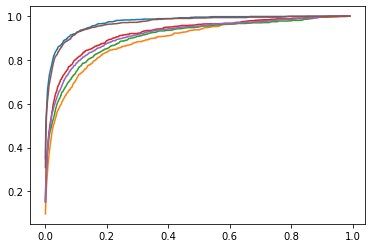

In [43]:
params_fixed = {'n':60,
                'm':60,
                'degree_1':2.1,
                'degree_2':2.2,
                'type':'gaussian'
                }



plt.plot(data['RW']['alpha'].loc[(data['RW']['tmax'] == 1)], data['RW']['MMD_u'].loc[(data['RW']['tmax'] == 1)])
plt.plot(data['RW']['alpha'].loc[(data['RW']['tmax'] == 2)], data['RW']['MMD_u'].loc[(data['RW']['tmax'] == 2)])
plt.plot(data['RW']['alpha'].loc[(data['RW']['tmax'] == 4)], data['RW']['MMD_u'].loc[(data['RW']['tmax'] == 4)])
plt.plot(data['RW']['alpha'].loc[(data['RW']['tmax'] == 6)], data['RW']['MMD_u'].loc[(data['RW']['tmax'] == 6)])
plt.plot(data['RW']['alpha'].loc[(data['RW']['tmax'] == 8)], data['RW']['MMD_u'].loc[(data['RW']['tmax'] == 8)])
# plt.plot(data['RW']['alpha'].loc[(data['RW']['tmax'] == 1)], data['RW']['MMD_u'].loc[(data['RW']['tmax'] == 1)])
plt.plot(data['RW']['alpha'].loc[data['RW']['type'] == 'ARKU_plus'], data['RW']['MMD_u'].loc[data['RW']['type'] == 'ARKU_plus'])

#plt.plot(data['RW']['alpha'].loc[data['RW']['type'] == 'ARKU_plus'], data['RW']['MMD_b'].loc[data['RW']['type'] == 'ARKU_plus'])
#plt.plot(data['RW']['alpha'].loc[data['RW']['type'] == 'ARKU_plus'], data['RW']['MONK_EST'].loc[data['RW']['type'] == 'ARKU_plus'])


# SP degree

0.2966666666666667
0.33111111111111113
0.5633333333333334


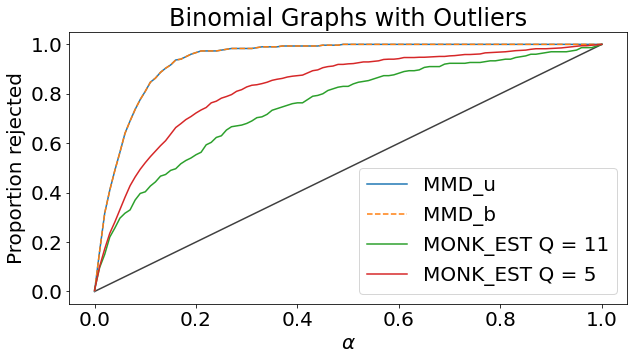

In [18]:
sp_degree11 = pd.read_pickle('../data/Robust/degree_4_4_7.pkl')
sp_degree5 = pd.read_pickle('../data/Robust/degree_4_4_7_q_5.pkl')
plt.rcParams.update({'font.size': 20})

alphas = np.linspace(start = 0, stop = 1, num = 101)
MMD_u = []
MMD_b = []
MONK_EST_q_11 = []
MONK_EST_q_5 = []


for alpha in alphas:

    MMD_u.append(np.sum(sp_degree11['MMD_u'] <= alpha)/sp_degree11.shape[0])
    MMD_b.append(np.sum(sp_degree11['MMD_b'] <= alpha)/sp_degree11.shape[0])
    MONK_EST_q_11.append(np.sum(sp_degree11['MONK_EST'] <= alpha)/sp_degree11.shape[0])
    MONK_EST_q_5.append(np.sum(sp_degree5['MONK_EST'] <= alpha)/sp_degree5.shape[0])

fig, ax = plt.subplots(1,1, figsize = (10,5))

ax.plot(alphas, MMD_u, label = 'MMD_u')
ax.plot(alphas, MMD_b, label = 'MMD_b', linestyle = 'dashed')
ax.plot(alphas, MONK_EST_q_11, label = 'MONK_EST Q = 11')
ax.plot(alphas, MONK_EST_q_5, label = 'MONK_EST Q = 5')
ax.plot([0,1], [0,1], alpha=0.75, zorder=0, color = 'black')
ax.legend()
ax.set_title('Binomial Graphs with Outliers')
ax.set_ylabel('Proportion rejected')
ax.set_xlabel(r'$\alpha$')


print(MONK_EST_q_11[np.where(alphas == 0.05)[0][0]])
print(MONK_EST_q_5[np.where(alphas == 0.05)[0][0]])
print(MMD_u[np.where(alphas == 0.05)[0][0]])

Attributed

In [21]:
attributed_q_5 = pd.read_pickle('../data/Robust/attributed_q_5.pkl')
attributed_q_9 = pd.read_pickle('../data/Robust/attributed_q_9.pkl')
attributed_q_11 = pd.read_pickle('../data/Robust/attributed_q_11.pkl')

0.09666666666666666
0.08
0.09555555555555556
0.14666666666666667


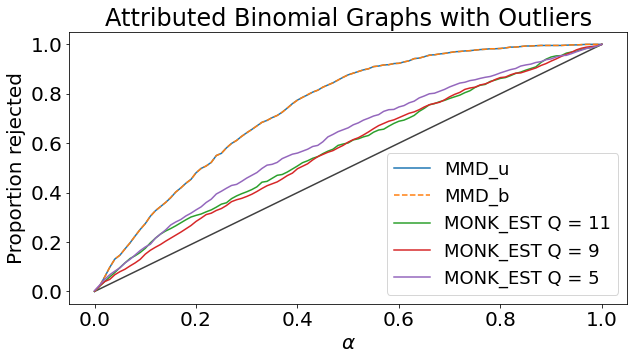

In [27]:
attributed_q_5 = pd.read_pickle('../data/Robust/attributed_q_5.pkl')
attributed_q_9 = pd.read_pickle('../data/Robust/attributed_q_9.pkl')
attributed_q_11 = pd.read_pickle('../data/Robust/attributed_q_11.pkl')
plt.rcParams.update({'font.size': 20})

alphas = np.linspace(start = 0, stop = 1, num = 101)
MMD_u = []
MMD_b = []
MONK_EST_q_11 = []
MONK_EST_q_9 = []
MONK_EST_q_5 = []


for alpha in alphas:

    MMD_u.append(np.sum(attributed_q_11['MMD_u'] <= alpha)/attributed_q_11.shape[0])
    MMD_b.append(np.sum(attributed_q_11['MMD_b'] <= alpha)/attributed_q_11.shape[0])
    MONK_EST_q_11.append(np.sum(attributed_q_11['MONK_EST'] <= alpha)/attributed_q_11.shape[0])
    MONK_EST_q_9.append(np.sum(attributed_q_9['MONK_EST'] <= alpha)/attributed_q_9.shape[0])
    MONK_EST_q_5.append(np.sum(attributed_q_5['MONK_EST'] <= alpha)/attributed_q_5.shape[0])

fig, ax = plt.subplots(1,1, figsize = (10,5))

ax.plot(alphas, MMD_u, label = 'MMD_u')
ax.plot(alphas, MMD_b, label = 'MMD_b', linestyle = 'dashed')
ax.plot(alphas, MONK_EST_q_11, label = 'MONK_EST Q = 11')
ax.plot(alphas, MONK_EST_q_9, label = 'MONK_EST Q = 9')
ax.plot(alphas, MONK_EST_q_5, label = 'MONK_EST Q = 5')
ax.plot([0,1], [0,1], alpha=0.75, zorder=0, color = 'black')
ax.legend(prop={'size': 18})
ax.set_title('Attributed Binomial Graphs with Outliers')
ax.set_ylabel('Proportion rejected')
ax.set_xlabel(r'$\alpha$')


print(MONK_EST_q_11[np.where(alphas == 0.05)[0][0]])
print(MONK_EST_q_9[np.where(alphas == 0.05)[0][0]])
print(MONK_EST_q_5[np.where(alphas == 0.05)[0][0]])
print(MMD_u[np.where(alphas == 0.05)[0][0]])